# Credit Card Defaulters

#### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

#### Importing the Dataset

In [2]:
df = pd.read_excel('default_of_credit_card_clients_0.xlsx')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

No inconsistent datatypes in the data. Neither do we have any missing values.

In [4]:
# X_equaled = pd.concat([df[df['default payment next month']==0][:len(df[df['default payment next month']==1])],df[df['default payment next month']==1]])
# X_equaled = X_equaled.reset_index(drop=True)

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# X = X_equaled.iloc[:, :-1]
# y = X_equaled.iloc[:, -1]

Let's have a look at the Target variable.

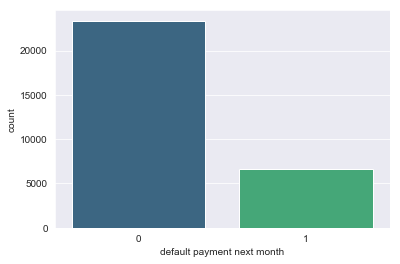

In [6]:
sns.countplot(y, palette= 'viridis')
plt.show()

We can see that there is imbalance in the dataset in favour for the Non-Defaulters. So we should fix that by equally sampling.

In [7]:
X_equaled = pd.concat([df[df['default payment next month']==0][:len(df[df['default payment next month']==1])],df[df['default payment next month']==1]])
X_equaled = X_equaled.reset_index(drop=True)
X = X_equaled.iloc[:, :-1]
y = X_equaled.iloc[:, -1]

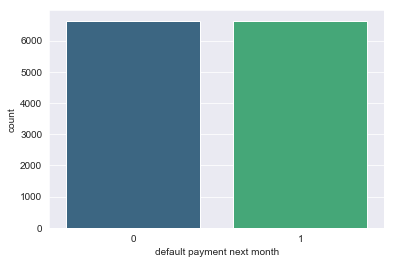

In [8]:
sns.countplot(y, palette= 'viridis')
plt.show()

Looking at the Correlation amoung **Bill Amounts**, **Pay Amounts** and **Pays**.

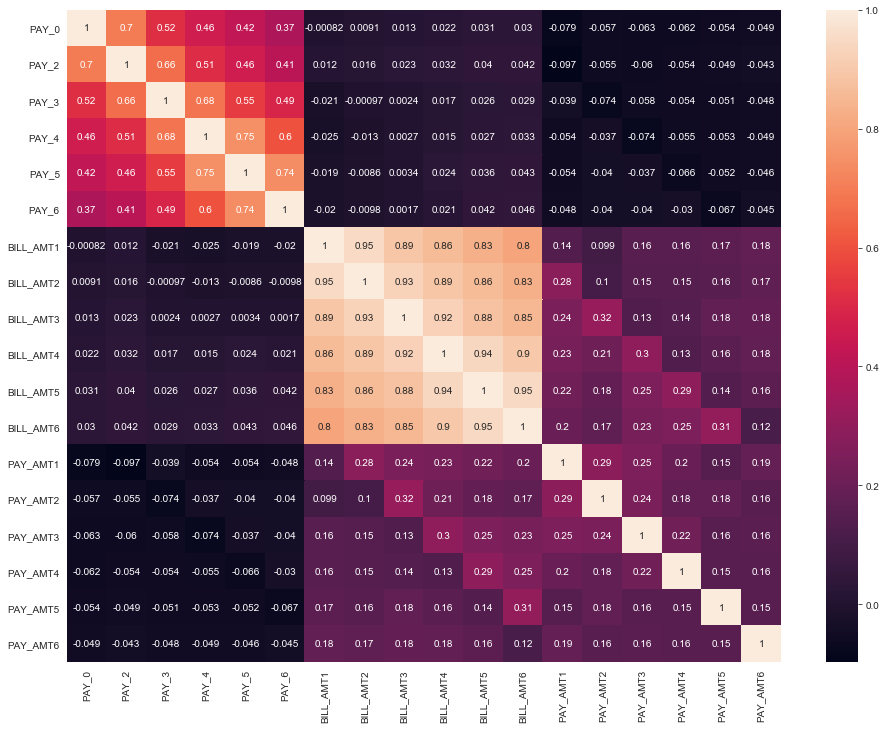

In [9]:
plt.figure(figsize=(16,12))
sns.heatmap(df.iloc[:,6:-1].corr(), annot = True)
plt.show()

There seems to be a very strong correlation among the **Bill Amounts**

We can try visualising it.

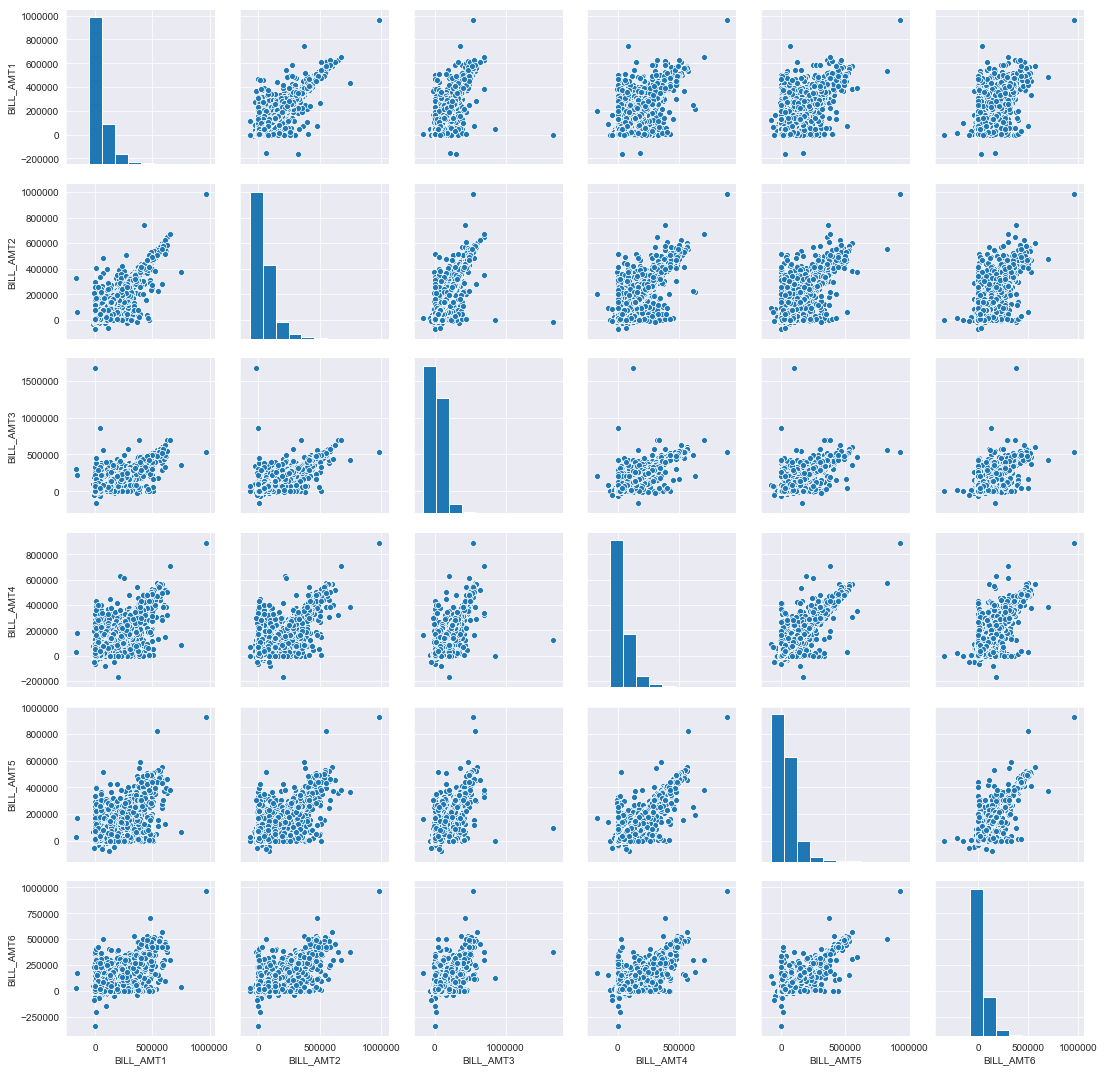

In [10]:
sns.pairplot(df.iloc[:,12:18])
plt.show()

#### Scaling

In [11]:
# from sklearn.preprocessing import Normalizer
# norm = Normalizer()
# X = norm.fit_transform(X)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20)

In [14]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()

In [15]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(criterion='entropy', max_depth= 3)

In [16]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1313
           1       0.94      0.80      0.86      1342

    accuracy                           0.87      2655
   macro avg       0.88      0.87      0.87      2655
weighted avg       0.88      0.87      0.87      2655



The accuracy on the test set is 87.30697 %
The accuracy on the train set is 87.75549 %


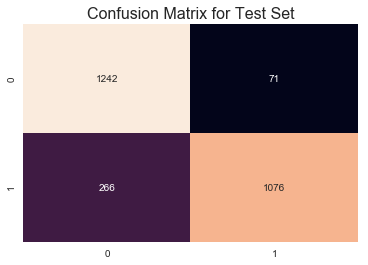

In [19]:
from sklearn.metrics import accuracy_score
print("The accuracy on the test set is {:.5f} %".format(accuracy_score(y_test, y_pred) * 100))
print("The accuracy on the train set is {:.5f} %".format(accuracy_score(y_train, classifier.predict(X_train)) * 100))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.0f', cbar= False)
plt.title('Confusion Matrix for Test Set', fontsize = 16)
plt.show()

_____